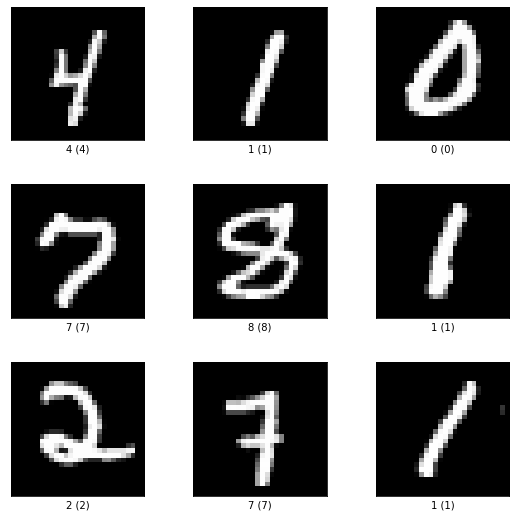

In [7]:
import tensorflow_datasets as tfds

name = 'mnist'
ds, info = tfds.load(name, with_info=True, as_supervised=True)
f = tfds.show_examples(ds['train'], info)

In [8]:
import numpy as np
from keras.utils import np_utils

ds = tfds.as_numpy(tfds.load(name, as_supervised=True, batch_size=-1))
(X_train, y_train), (X_test, y_test) = ds['train'], ds['test']

classes = 10
y_test = np_utils.to_categorical(y_test, classes)
y_train = np_utils.to_categorical(y_train, classes)

In [9]:
print("X_train", X_train.shape, "X_test", X_test.shape)
print("y_train", y_train.shape, "y_test", y_test.shape)

X_train (60000, 28, 28, 1) X_test (10000, 28, 28, 1)
y_train (60000, 10) y_test (10000, 10)


In [10]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense

model = Sequential() # 建立空的模型框架
model.add(InputLayer(input_shape=(28, 28, 1))) # 第一層這樣固定
# ↓↓↓發揮想像力的時候到了↓↓↓

# 有用到卷積層只要改第一個數字就好，經驗上是2的倍數，其他照舊，長寬維度每次會少2
model.add(Conv2D(16, 3, activation='relu'))

# 用到池化層這樣打就好，注意!前一層如果有某個維度是1會報錯(1不能再除了阿~)
model.add(MaxPool2D())

model.add(Flatten()) # 接Dense之前要先Flatten

# 神經元也可以多層組成FC，一樣改第一個數字
model.add(Dense(32, activation='relu'))

# ↑↑↑發揮想像力的時候到了↑↑↑

# 最後一層輸出的activation給固定"softmax"
model.add(Dense(10, activation='softmax'))

# 模型總覽
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                86560     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 87,050
Trainable params: 87,050
Non-trainable params: 0
__________________________________________________

In [11]:
import matplotlib.pyplot as plt

def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(train_history.history["accuracy"])
    plt.plot(train_history.history["val_accuracy"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="best")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="best")
    plt.show()

Epoch 1/50
240/240 [==============================] - 6s 22ms/step - loss: 2.0295 - accuracy: 0.4354 - val_loss: 1.1980 - val_accuracy: 0.5954
Epoch 2/50
240/240 [==============================] - 5s 21ms/step - loss: 1.0189 - accuracy: 0.6576 - val_loss: 0.9649 - val_accuracy: 0.6639
Epoch 3/50
240/240 [==============================] - 5s 23ms/step - loss: 0.7191 - accuracy: 0.7723 - val_loss: 0.5122 - val_accuracy: 0.9096
Epoch 4/50
240/240 [==============================] - 6s 24ms/step - loss: 0.3943 - accuracy: 0.9256 - val_loss: 0.2790 - val_accuracy: 0.9339
Epoch 5/50
240/240 [==============================] - 6s 24ms/step - loss: 0.1897 - accuracy: 0.9506 - val_loss: 0.1893 - val_accuracy: 0.9532
Epoch 6/50
240/240 [==============================] - 6s 24ms/step - loss: 0.1324 - accuracy: 0.9634 - val_loss: 0.1576 - val_accuracy: 0.9611
Epoch 7/50
240/240 [==============================] - 6s 24ms/step - loss: 0.1042 - accuracy: 0.9706 - val_loss: 0.1500 - val_accuracy: 0.9642

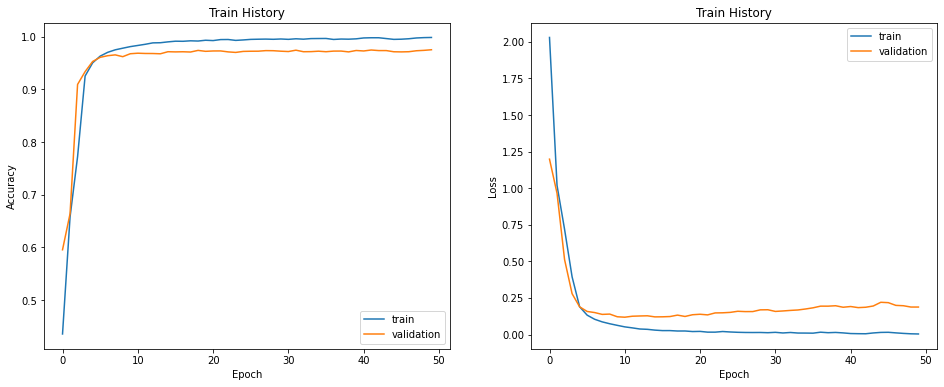

In [12]:
# 編譯模型，帶入最佳化函數與損失函數，先都固定就好
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 開始訓練
# epochs:訓練幾回，batch_size:一次丟多少筆訓練，verbose:輸出訊息, validation_split:從訓練集切驗證集的比例
train_history = model.fit(X_train, y_train, epochs=50, batch_size=200, verbose=1, validation_split=0.2)

# 計算測試集的準確度分數
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', score[1]) 

# 畫出訓練歷程
show_train_history(train_history)